In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 100micro

In [2]:
modulation = 93 #Hz
loop_number = 10    
res = 1/3003004800

sam, sr , cycle_length = Adj9(res,modulation,loop_number)

In [3]:
sam

1614528

In [4]:
sr

3003022080

In [5]:
interval = cycle_length*1e6 #micro
interval

537.6344086021505

# AWG and Pulse files setup

In [6]:
AWG_Settings_100micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':150,
    'Clock Sample Frecuency':3003022080,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\neg\100micro'
}

In [7]:
M8190A = VisaR(AWG_Settings_100micro,60000)

In [8]:
M8190A.write('FREQ:RAST {a}'.format(a = sr))

21

In [11]:
Initialization(M8190A,AWG_Settings_100micro)

Instruments Sampling Frecuency set to 3.00337920000000E+09Hz
Instruments Direct Out DC Output route Voltage set to 6.75000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [9]:
Pump_100micro = {
    'Name':'Pump_100micro',
    'Amplitude': -2*60,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
ProbeA_100micro = {
    'Name':'ProbeA_100micro',
    'Amplitude':-2*30,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [11]:
ProbeB_100micro= {
    'Name':'ProbeB_100micro',
    'Amplitude':2*30,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':6,
    'Sweep time':1,
    'Sweep Duration':0
}

In [13]:
PulseScheme_A_100micro =  {
    'Name' : 'PulseScheme_A_100micro',
    'Pulse Scheme': [Pump_100micro,ProbeA_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\neg\100micro'
}

In [14]:
PulseScheme_B_100micro =  {
    'Name' : 'PulseScheme_B_1nano',
    'Pulse Scheme': [Pump_100micro,ProbeB_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\neg\1nano'
}

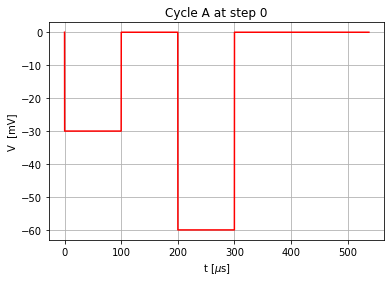

In [17]:
step = 0
pul1 = Sweep_dir_noteil(PulseScheme_A_100micro,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100micro {mod} Hz ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

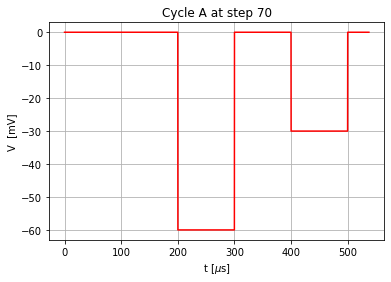

In [18]:
step = 70
pul1 = Sweep_teil(PulseScheme_A_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100micro {mod} Hz ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

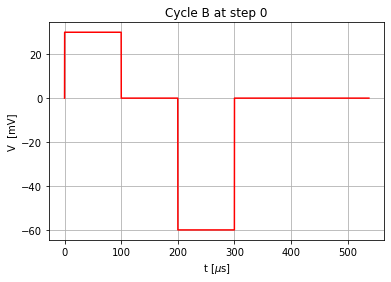

In [17]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100micro {mod} Hz  ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

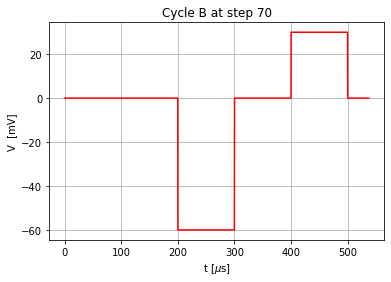

In [18]:
step = 70
pul1 = Sweep_teil(PulseScheme_B_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100micro {mod} Hz  ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

In [19]:
sweeping_run_a_100micro = Sweeping_Single_List_File_teil(PulseScheme_A_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'A')[0]
sweeping_run_b_100micro = Sweeping_Single_List_File_teil(PulseScheme_B_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'B')[0]

In [21]:
#Exporting pickle

with open(r"{dict}\cycleA_71steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100micro, k)


with open(r"{dict}\cycleB_71steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as j:
    sweeping_runa_100microicro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as f:
    sweeping_runb_100micro= pickle.load(f)

In [23]:
sweeping_run_a_100micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\60,30\\neg\\100micro\\SegmentA_1614528_30.csv'

In [29]:
Sequence_File(M8190A,sweeping_run_a_100micro['Pulse File Location, at step 0'],sweeping_run_b_100micro['Pulse File Location, at step 0'],10)

Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND


8

In [23]:
loop_number

10

# Loading

In [34]:
M8190A.write('SEQ:DEL:ALL')

12

In [25]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '50 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': r'{mod}Hz'.format(mod=modulation)
}

In [35]:
playingtime = 5

data, averaged_data = Voltage_Autocorrelation_loop_cut(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100micro,sweeping_run_b_100micro,PulseScheme_A_100micro['Measurement file Path'],Lock_In_Settings,loop_number,2)

Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 0 is -1.2732601415244285 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 1 is -1.2757822985281004 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 2 is -1.2859018409398852 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 3 is -1.300978544891117 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 4 is -1.3073669787439632 V
Sequence loaded with the following segment data "1,10,0,1,0,1

In [36]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(data)):
    plt.plot(data[i][1],data[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [arb. U]')
ax.set_xlabel('t  [s]')
ax.set_title(r' STM Signal at Different Steps,  {b} Samples, 100$\mu$s probe duration'.format(b = len(data[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\STM Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 100micro ,{st} steps, {mod} Hz.jpeg'.format(mod = modulation ,loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, st = len (sweeping_run_a_100micro)),bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [37]:
time_delay = np.linspace(-200,200,31)

In [32]:
%matplotlib widget

In [38]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,'.-',label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()


fig.savefig(r'{loc}\Measured Autocorrelation function {st} steps 100micro {mod} Hz length tc = {a}, sens {b}, {c}s DAQ, {loop} loop number .jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, loop =loop_number,st = len (time_delay), mod = modulation ))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
background_100u = Signal_to_Background(averaged_data,time_delay,8,8)
background_100u

In [ ]:
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,background_100u[0],'.-',label=r'100 $\mu$s Pulse Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\background corrected Autocorrelation function {st} steps 100micro {mod} Hz length tc = {a}, sens {b}, {c}s DAQ, {loop} loop number .jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, loop =loop_number,st = len (time_delay), mod = modulation ))

In [ ]:
norm_100u=(background_100u[0]-1)/(np.amax(background_100u[0]-1))
np.savetxt(r'Averaged\Signal to background\Normalized autocorrelation 100u.csv',norm_100u,delimiter=',')



fig,axes = plt.subplots()

axes.grid(True)


plt.plot(time_delay,norm_100u,'.-',label=r'100 $\mu$s Pulse Width ',color='green')


axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Normalized Autocorrelation function {st} steps 100micro {mod} Hz length tc = {a}, sens {b}, {c}s DAQ, {loop} loop number .jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, loop =loop_number,st = len (time_delay), mod = modulation ))